**Importing Libraries**

In [4]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [6]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [7]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [8]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]


In [9]:
df_pathway.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,...,SAG,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP
0,1_50:60_F,Female,50-60,64.6,253.0,92.0,151.0,114.0,104.2,95.6,...,82.0,192.0,156.4,163.2,220.0,182.0,124.0,275.0,73.0,165.0
1,2_50:60_F,Female,50-60,76.0,239.0,76.8,150.0,120.0,104.2,86.0,...,84.0,203.0,159.0,145.0,228.4,200.0,113.0,251.0,67.0,159.0
2,3_40:50_F,Female,40-50,55.0,257.0,79.8,144.0,131.0,117.0,97.8,...,98.2,198.0,159.0,174.0,231.0,188.0,136.0,255.0,72.0,162.0
3,4_40:50_F,Female,40-50,70.0,228.0,72.0,145.0,140.0,104.0,96.0,...,98.0,183.0,164.2,153.4,236.4,188.0,119.0,260.4,71.0,184.0
4,5_50:60_F,Female,50-60,74.2,250.8,67.0,161.6,113.0,92.0,95.2,...,109.0,194.8,160.0,172.0,226.6,196.0,117.0,257.0,68.0,170.0


In [10]:
print(df_pathway.shape)   # dataset rows & columns
df_pathway.columns        # columns of the dataset

(500, 85)


Index(['Samples', 'Gender', 'Age_Group', 'ABCC6', 'ACBD5', 'AFG3L2', 'AIPL1',
       'ALMS1', 'APOD', 'APOE', 'ARL2BP', 'ARL6', 'ARMS2', 'ARSG', 'BBS10',
       'BBS2', 'BEST1', 'C2', 'C3', 'C8orf37', 'CABP4', 'CACNA1F', 'CAPN5',
       'CC2D2A', 'CFB', 'CFD', 'CFHR1', 'CHM', 'CLCC1', 'CLN3', 'CLRN1',
       'CLUAP1', 'CNGB3', 'CNNM4', 'COX2', 'CYSLT1R', 'ESPN', 'GRK1', 'GUCY2D',
       'HGSNAT', 'HMCN1', 'IFT27', 'IMPG1', 'ITM2B', 'KLHL7', 'LCA5', 'LRAT',
       'LRP5', 'LTB4R', 'LTE4', 'LZTFL1', 'MYO7A', 'NDP', 'NEK2', 'NPHP1',
       'NR2E3', 'NRL', 'PCARE', 'PCDH15', 'PDE6B', 'PDE6C', 'PDZD7', 'PEX7',
       'POC1B', 'PRDM13', 'PROM1', 'PRPF4', 'RB1', 'RDH5', 'REEP6', 'RGR',
       'RGS9BP', 'RLBP1', 'RP1L1', 'RPGR', 'SAG', 'SDCCAG8', 'TIMP3',
       'TSPAN12', 'TTC8', 'TUBGCP4', 'TUBGCP6', 'USH2A', 'VEGFA', 'WDPCP'],
      dtype='object')

In [11]:
# pathways and their associated genes
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Create a new DataFrame to hold pathway scores
pathway_scores = pd.DataFrame()

for pathway, genes in pathways.items():
    # Calculate the pathway score as the mean of the gene expressions
    pathway_scores[pathway] = df_pathway[genes].mean(axis=1)

# Add the 'Samples' column to the new DataFrame
pathway_scores['Samples'] = df_pathway['Samples']

# Round the pathway scores to 2 decimal places
pathway_scores = pathway_scores.round(2)

# Reorder columns to have 'Samples' as the first column
pathway_scores = pathway_scores[['Samples'] + [col for col in pathway_scores.columns if col != 'Samples']]



In [12]:
pathway_scores.head()

,Samples,Inflammation,Oxidative_Stress,Immunity,Apoptosis,Aging,Visual_Perception,Ciliopathy,Lipid_Metabolism,Cellular_Transport,Signal_Transduction
0,1_50:60_F,90.05,131.20,86.5,245.13,162.65,190.10,173.17,139.10,159.62,213.67
1,2_50:60_F,90.38,129.55,98.9,239.67,160.90,190.58,174.84,143.30,160.98,211.00
2,3_40:50_F,91.25,136.00,94.3,252.33,166.25,190.71,177.31,141.13,161.11,214.87
3,4_40:50_F,89.15,136.75,93.0,250.07,164.65,195.31,177.33,140.33,160.24,211.13
4,5_50:60_F,93.00,132.80,105.5,238.80,161.55,193.71,175.66,139.87,159.01,223.67


In [13]:
pathway_scores.tail()

,Samples,Inflammation,Oxidative_Stress,Immunity,Apoptosis,Aging,Visual_Perception,Ciliopathy,Lipid_Metabolism,Cellular_Transport,Signal_Transduction
495,235_50:60_M,95.82,128.85,89.5,242.40,168.20,195.56,178.41,138.27,158.62,218.67
496,236_40:50_M,97.25,124.00,91.0,247.00,171.05,196.08,179.13,141.73,158.11,224.13
497,237_50:60_M,101.00,129.50,85.5,241.33,168.20,196.09,172.93,141.40,161.08,228.33
498,238_40:50_M,98.50,129.00,80.5,245.33,173.85,192.70,173.30,139.73,154.91,226.07
499,239_50:60_M,102.20,130.45,83.0,253.33,172.75,193.30,175.04,137.30,158.88,218.33


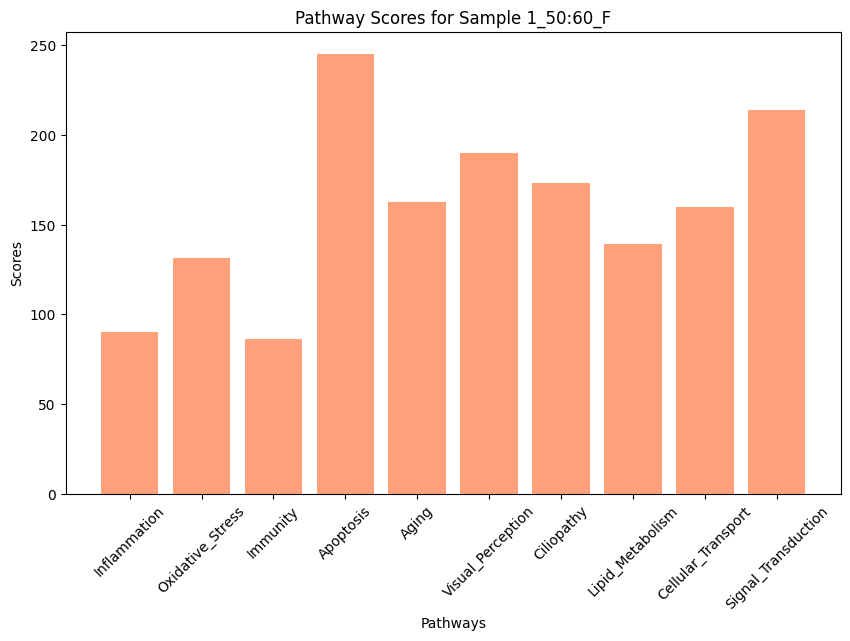

In [14]:
# Bar plot
# Select the sample of interest
sample_index = 0  # Example: first sample
sample_data = pathway_scores.iloc[sample_index, 1:]

plt.figure(figsize=(10, 6))
plt.bar(sample_data.index, sample_data.values, color='LightSalmon')
plt.xlabel('Pathways')
plt.ylabel('Scores')
plt.title(f'Pathway Scores for Sample {pathway_scores.iloc[sample_index, 0]}')
plt.xticks(rotation=45)
plt.show()


In [15]:
# # Define the range of samples to visualize
# sample_indices = range(len(pathway_scores))  # All samples

# for sample_index in sample_indices:
#     sample_data = pathway_scores.iloc[sample_index, 1:]

#     plt.figure(figsize=(10, 6))
#     plt.bar(sample_data.index, sample_data.values, color='skyblue')
#     plt.xlabel('Pathways')
#     plt.ylabel('Scores')
#     plt.title(f'Pathway Scores for Sample {pathway_scores.iloc[sample_index, 0]}')
#     plt.xticks(rotation=45)
#     plt.show()


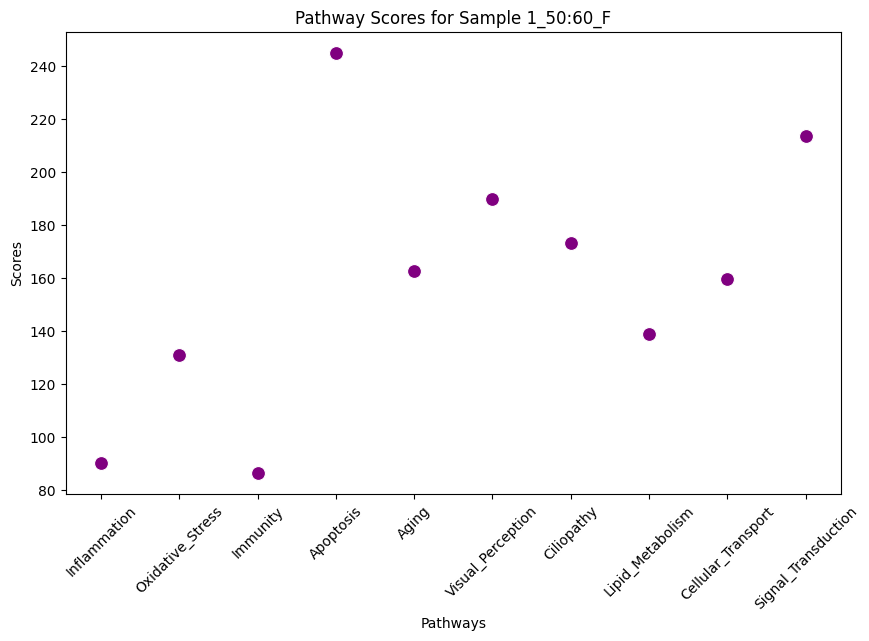

In [16]:
# Dot plot
# Create a DataFrame for the selected sample
sample_index = 0  # Example: first sample, you can put specific sample number to visualize
sample_data = pathway_scores.iloc[sample_index, 1:]
sample_df = pd.DataFrame({
    'Pathway': sample_data.index,
    'Score': sample_data.values
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='Pathway', y='Score', s=100, color='purple')
plt.xlabel('Pathways')
plt.ylabel('Scores')
plt.title(f'Pathway Scores for Sample {pathway_scores.iloc[sample_index, 0]}')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Concatenate the additional columns
pathway_scores = pd.concat([pathway_scores, df_pathway[["Gender", "Age_Group"]]], axis=1)

In [18]:
print(pathway_scores.shape)   # dataset rows & columns
pathway_scores.columns        # columns of the dataset

(500, 13)


Index(['Samples', 'Inflammation', 'Oxidative_Stress', 'Immunity', 'Apoptosis',
       'Aging', 'Visual_Perception', 'Ciliopathy', 'Lipid_Metabolism',
       'Cellular_Transport', 'Signal_Transduction', 'Gender', 'Age_Group'],
      dtype='object')

In [19]:
pathway_scores.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Samples              500 non-null    object 
 1   Inflammation         500 non-null    float64
 2   Oxidative_Stress     500 non-null    float64
 3   Immunity             500 non-null    float64
 4   Apoptosis            500 non-null    float64
 5   Aging                500 non-null    float64
 6   Visual_Perception    500 non-null    float64
 7   Ciliopathy           500 non-null    float64
 8   Lipid_Metabolism     500 non-null    float64
 9   Cellular_Transport   500 non-null    float64
 10  Signal_Transduction  500 non-null    float64
 11  Gender               500 non-null    object 
 12  Age_Group            500 non-null    object 
dtypes: float64(10), object(3)
memory usage: 50.9+ KB


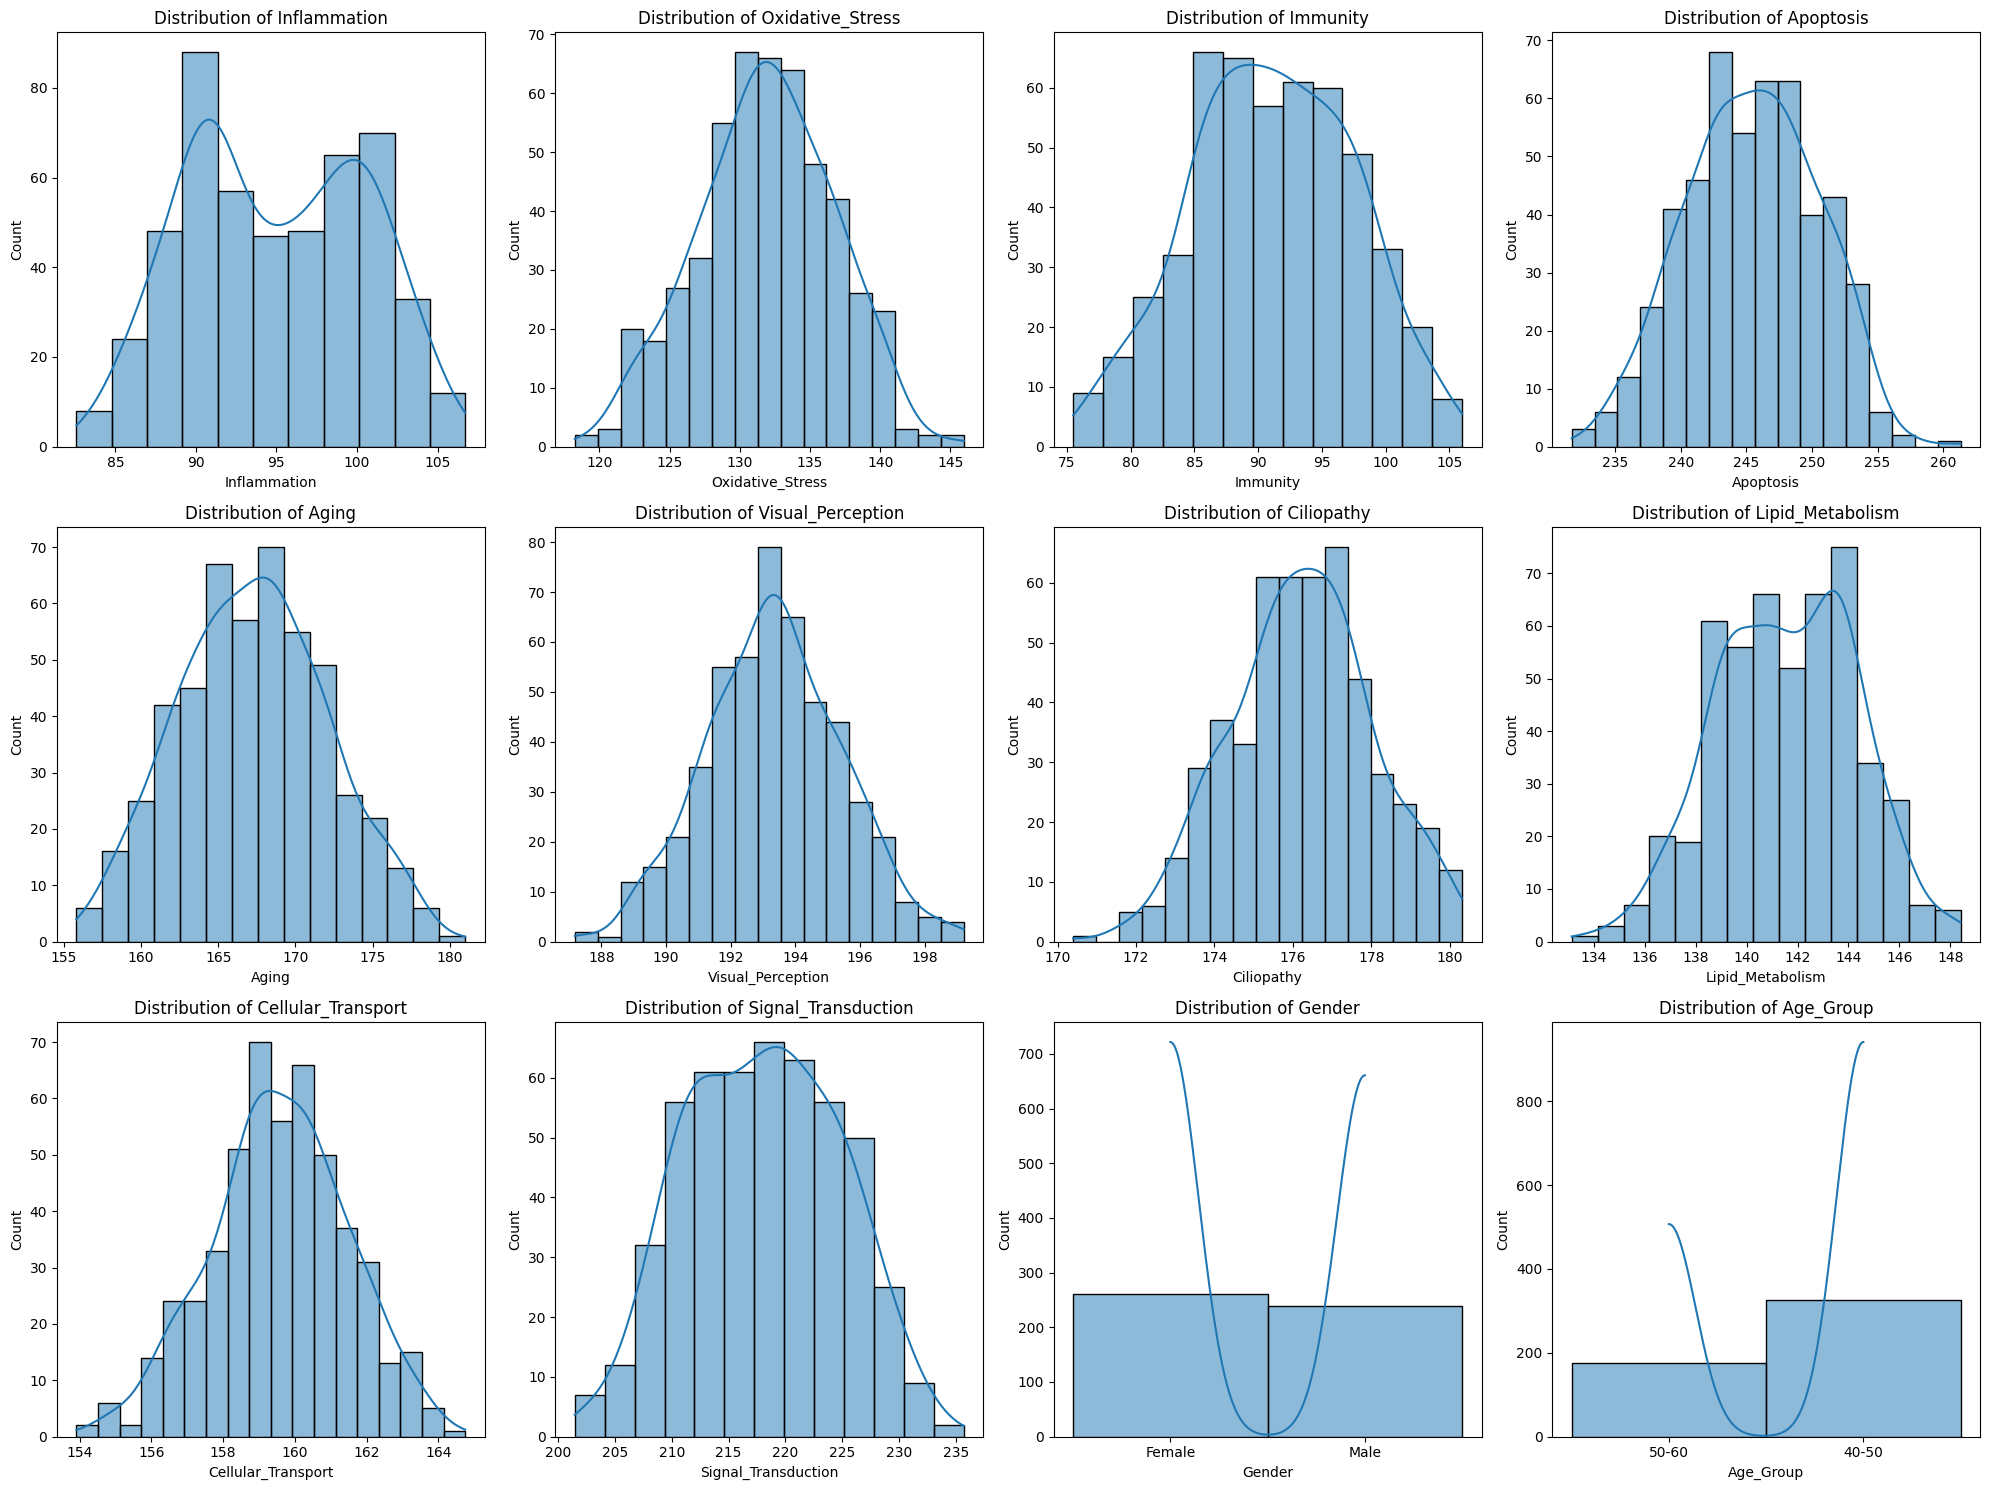

In [20]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(pathway_scores.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(pathway_scores.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(pathway_scores[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

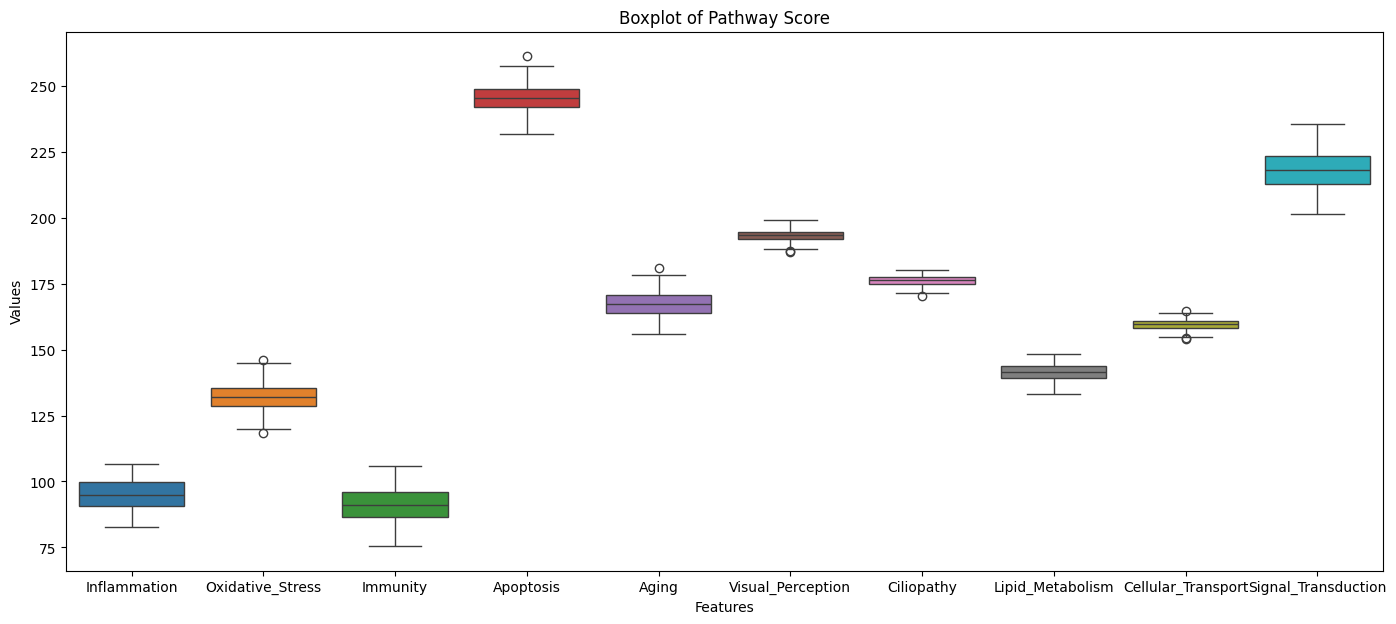

In [21]:
# Boxplot
plt.figure(figsize=(17, 7))
sns.boxplot(data=pathway_scores)

plt.title("Boxplot of Pathway Score")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


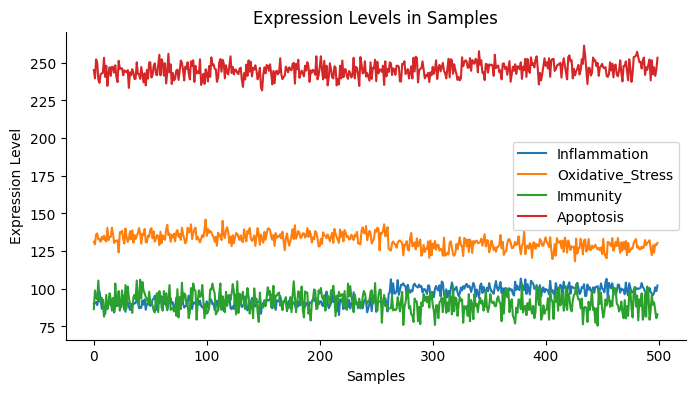

In [22]:
# Plotting proteins
pathway_scores[['Inflammation', 'Oxidative_Stress', 'Immunity', 'Apoptosis']].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


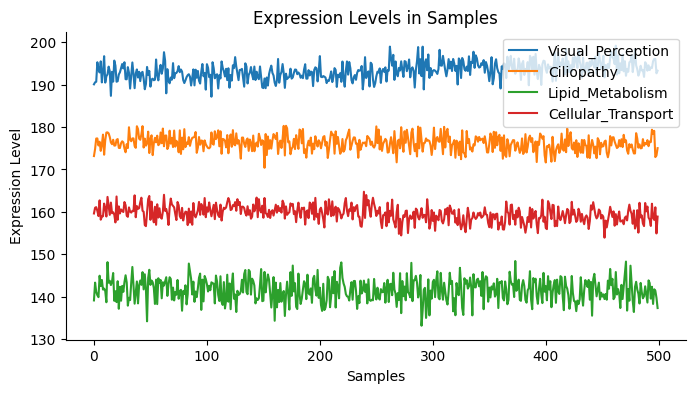

In [23]:
# Plotting proteins
pathway_scores[['Visual_Perception', 'Ciliopathy', 'Lipid_Metabolism', 'Cellular_Transport']].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


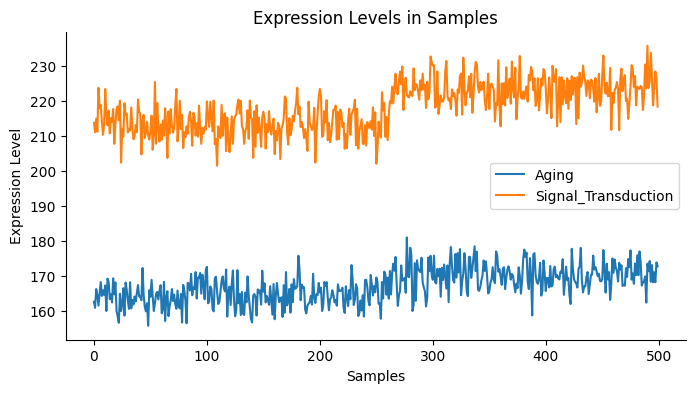

In [24]:
# Plotting proteins
pathway_scores[['Aging', 'Signal_Transduction']].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [25]:
# dictionary to store results for each protein
protein_stats = {}

for protein in pathway_scores.columns[1:-2]:
    expression_data = pathway_scores[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [26]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
Inflammation,100.0,94.950,5.514,5.807
Oxidative_Stress,100.0,131.883,4.847,3.675
Immunity,100.0,91.124,6.390,7.012
Apoptosis,100.0,245.416,4.987,2.032
Aging,100.0,167.276,4.792,2.865
Visual_Perception,100.0,193.341,2.091,1.082
Ciliopathy,100.0,176.226,1.804,1.024
Lipid_Metabolism,100.0,141.560,2.731,1.929
Cellular_Transport,100.0,159.573,1.904,1.193
Signal_Transduction,100.0,218.028,6.738,3.090


In [27]:
df_corr = pathway_scores.iloc[:, 1:-2]    # correlation among columns
df_corr.corr()

,Inflammation,Oxidative_Stress,Immunity,Apoptosis,Aging,Visual_Perception,Ciliopathy,Lipid_Metabolism,Cellular_Transport,Signal_Transduction
Inflammation,1.000000,-0.587110,-0.201804,0.330143,0.509209,0.402395,-0.146505,-0.018217,-0.362698,0.631438
Oxidative_Stress,-0.587110,1.000000,0.173497,-0.138668,-0.281893,-0.337174,0.116382,0.287756,0.254345,-0.535052
Immunity,-0.201804,0.173497,1.000000,-0.044340,-0.055565,-0.071808,0.065231,0.029024,0.167029,-0.193811
Apoptosis,0.330143,-0.138668,-0.044340,1.000000,0.153980,0.182846,-0.100069,0.009262,-0.177618,0.150948
Aging,0.509209,-0.281893,-0.055565,0.153980,1.000000,0.322241,-0.082019,0.100462,-0.214081,0.466851
Visual_Perception,0.402395,-0.337174,-0.071808,0.182846,0.322241,1.000000,-0.103901,-0.019101,-0.101172,0.345382
Ciliopathy,-0.146505,0.116382,0.065231,-0.100069,-0.082019,-0.103901,1.000000,0.004134,0.115878,-0.089320
Lipid_Metabolism,-0.018217,0.287756,0.029024,0.009262,0.100462,-0.019101,0.004134,1.000000,0.113737,-0.030479
Cellular_Transport,-0.362698,0.254345,0.167029,-0.177618,-0.214081,-0.101172,0.115878,0.113737,1.000000,-0.297380
Signal_Transduction,0.631438,-0.535052,-0.193811,0.150948,0.466851,0.345382,-0.089320,-0.030479,-0.297380,1.000000


There are notable interactions between Inflammation, Signal Transduction, and Aging, suggesting these pathways may be co-regulated or involved in similar biological processes.

Oxidative Stress tends to oppose pathways like Inflammation and Signal Transduction, which could indicate compensatory mechanisms or different biological roles.

Cellular Transport and Inflammation are inversely correlated, possibly due to metabolic changes during inflammatory responses.

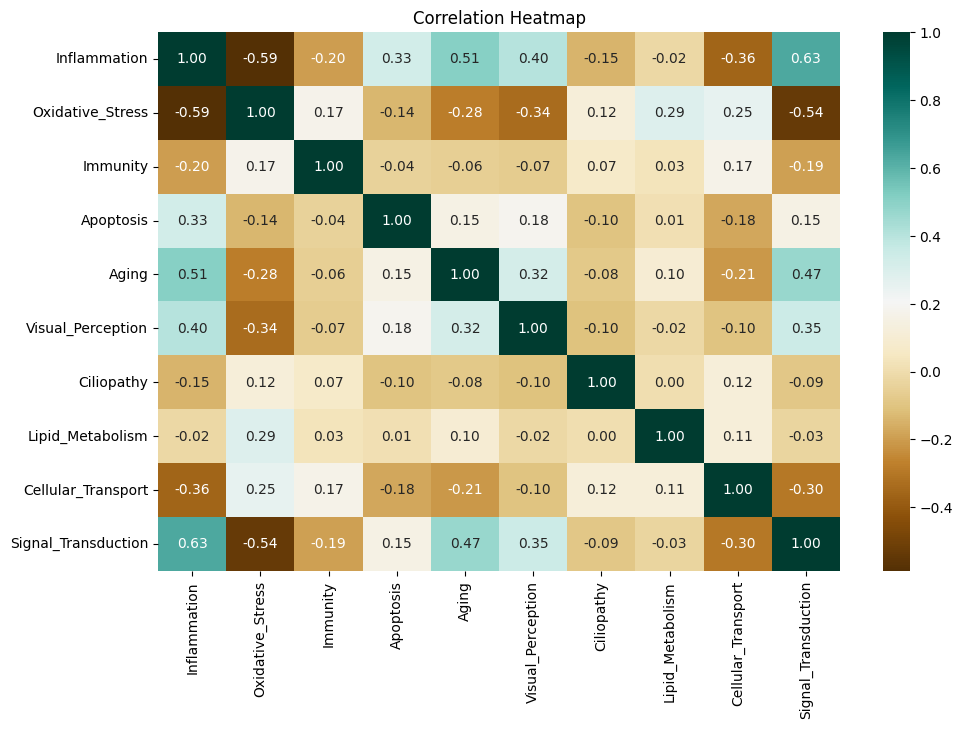

In [28]:
# Correlation Heatmap
plt.figure(figsize=(11, 7))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# Initialize the MinMaxScaler
try_m_scaler = MinMaxScaler()

# Select the columns [1:-2] (excluding the first and last two columns)
columns_to_scale = pathway_scores.columns[1:-2]

# Apply the scaler to the selected columns
pathway_scores[columns_to_scale] = try_m_scaler.fit_transform(pathway_scores[columns_to_scale])


In [30]:
df_corr_nom = pathway_scores.iloc[:, 1:-2]    # correlation among columns
df_corr_nom.corr()

,Inflammation,Oxidative_Stress,Immunity,Apoptosis,Aging,Visual_Perception,Ciliopathy,Lipid_Metabolism,Cellular_Transport,Signal_Transduction
Inflammation,1.000000,-0.587110,-0.201804,0.330143,0.509209,0.402395,-0.146505,-0.018217,-0.362698,0.631438
Oxidative_Stress,-0.587110,1.000000,0.173497,-0.138668,-0.281893,-0.337174,0.116382,0.287756,0.254345,-0.535052
Immunity,-0.201804,0.173497,1.000000,-0.044340,-0.055565,-0.071808,0.065231,0.029024,0.167029,-0.193811
Apoptosis,0.330143,-0.138668,-0.044340,1.000000,0.153980,0.182846,-0.100069,0.009262,-0.177618,0.150948
Aging,0.509209,-0.281893,-0.055565,0.153980,1.000000,0.322241,-0.082019,0.100462,-0.214081,0.466851
Visual_Perception,0.402395,-0.337174,-0.071808,0.182846,0.322241,1.000000,-0.103901,-0.019101,-0.101172,0.345382
Ciliopathy,-0.146505,0.116382,0.065231,-0.100069,-0.082019,-0.103901,1.000000,0.004134,0.115878,-0.089320
Lipid_Metabolism,-0.018217,0.287756,0.029024,0.009262,0.100462,-0.019101,0.004134,1.000000,0.113737,-0.030479
Cellular_Transport,-0.362698,0.254345,0.167029,-0.177618,-0.214081,-0.101172,0.115878,0.113737,1.000000,-0.297380
Signal_Transduction,0.631438,-0.535052,-0.193811,0.150948,0.466851,0.345382,-0.089320,-0.030479,-0.297380,1.000000


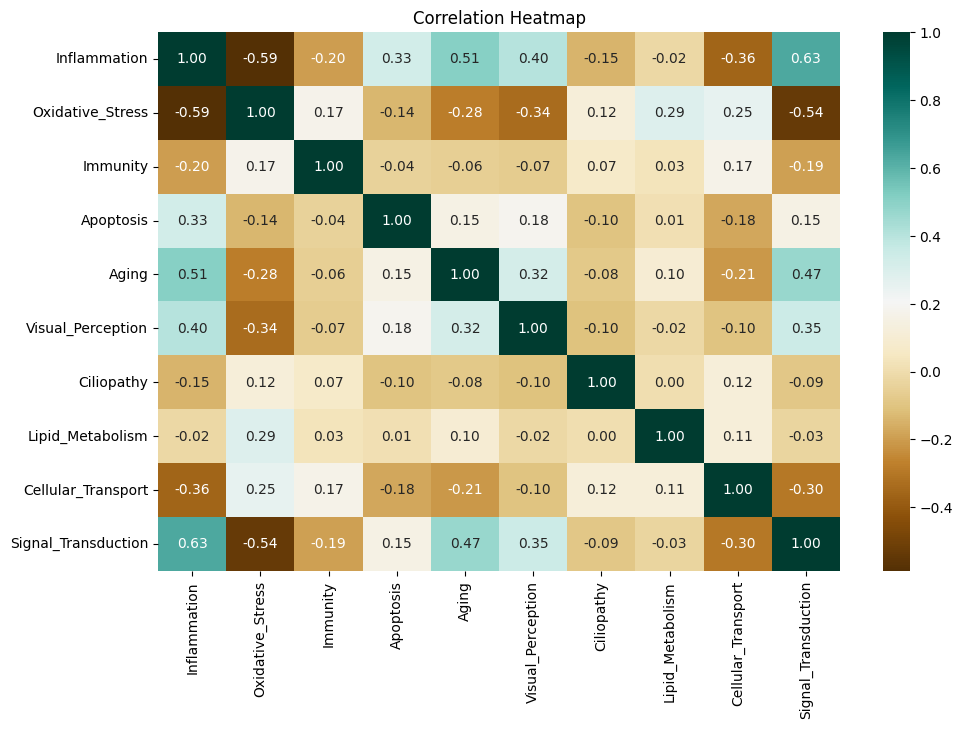

In [31]:
# Correlation Heatmap
plt.figure(figsize=(11, 7))
correlation_matrix = df_corr_nom.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [32]:
# Segregate data by gender and age group
males = pathway_scores[pathway_scores['Gender'] == 'Male']
females = pathway_scores[pathway_scores['Gender'] == 'Female']

age_40_50 = pathway_scores[pathway_scores['Age_Group'] == '40-50']
age_50_60 = pathway_scores[pathway_scores['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in pathway_scores.columns[1:-2]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Pathways with significant differences between genders:", significant_proteins_gender)
print("Pathways with significant differences between age groups:", significant_proteins_age)


Pathways with significant differences between genders: ['Inflammation', 'Oxidative_Stress', 'Immunity', 'Apoptosis', 'Aging', 'Visual_Perception', 'Ciliopathy', 'Cellular_Transport', 'Signal_Transduction']
Pathways with significant differences between age groups: []


In [33]:
print('Number of significant Pathways:', len(significant_proteins_gender))
print('Number of significant Pathways:', len(significant_proteins_age))

Number of significant Pathways: 9
Number of significant Pathways: 0


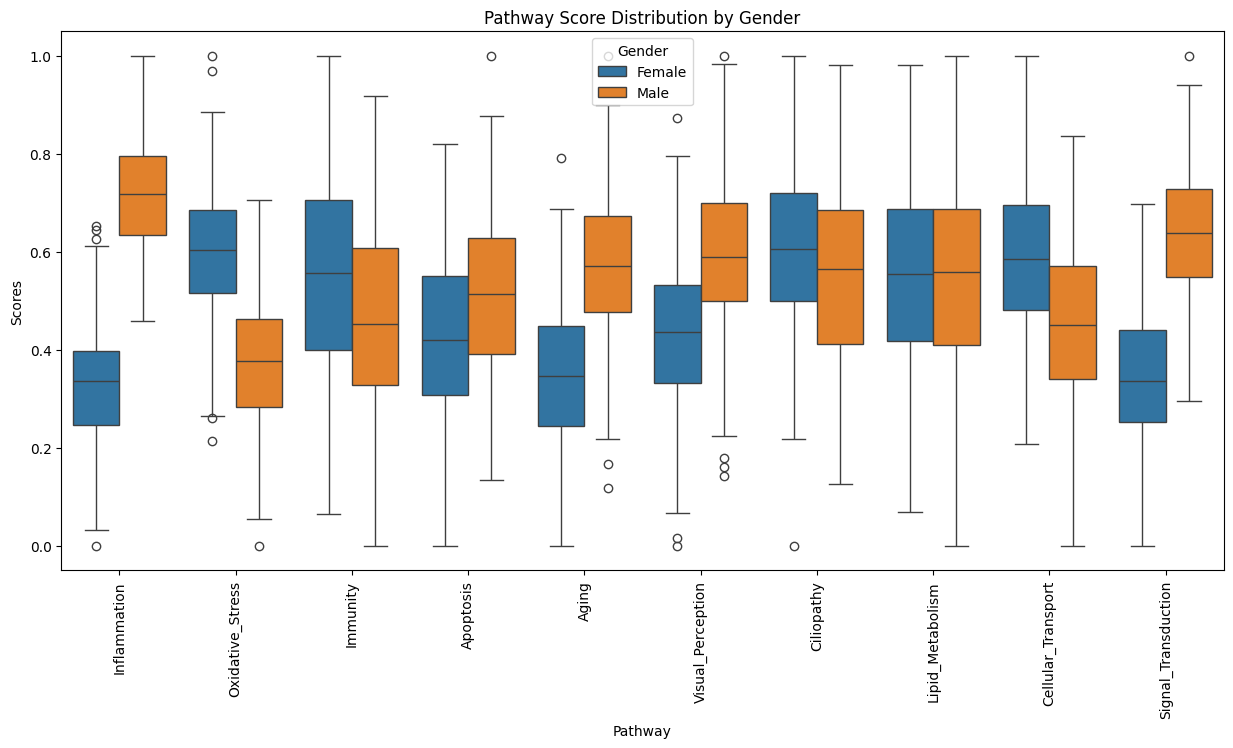

In [34]:
# Visualization: Distribution by Gender

melted_pathway_scores_df = pathway_scores.melt(id_vars='Gender', value_vars=pathway_scores.columns[1:-2], var_name='Pathway', value_name='Expression')

# Create a boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(x='Pathway', y='Expression', hue='Gender', data=melted_pathway_scores_df)
plt.xticks(rotation=90)
plt.title('Pathway Score Distribution by Gender')
plt.xlabel('Pathway')
plt.ylabel('Scores')
plt.show()


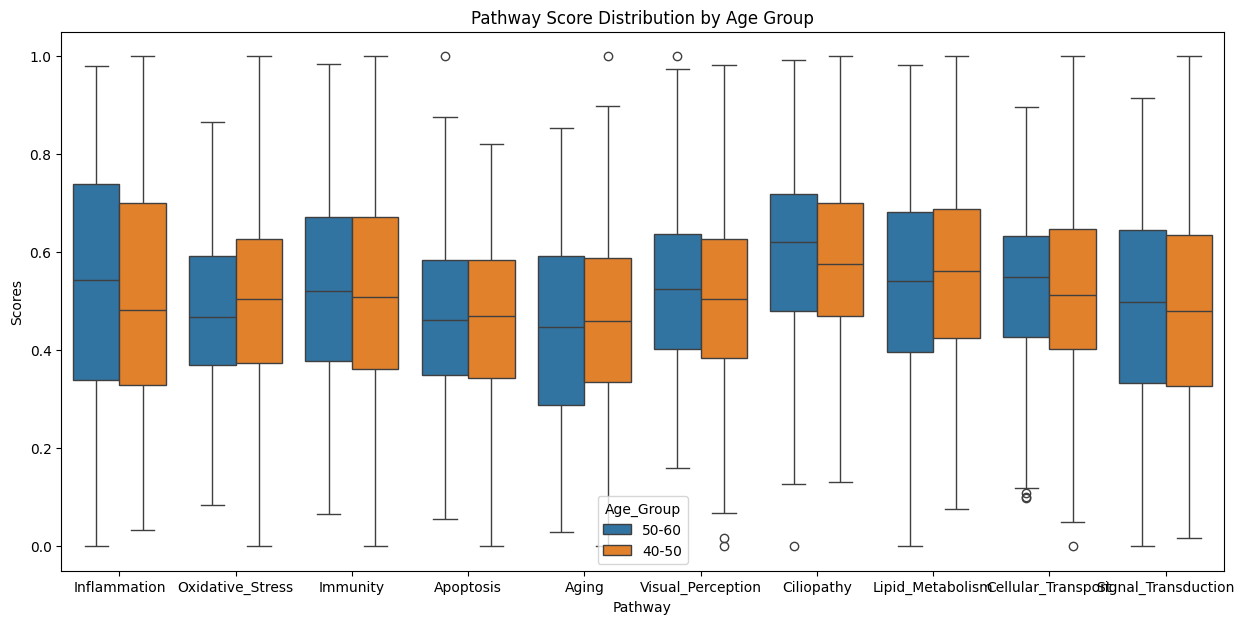

In [35]:
# Visualization: Distribution by Age_Group

melted_pathway_scores_df = pathway_scores.melt(id_vars='Age_Group', value_vars=pathway_scores.columns[1:-2], var_name='Pathway', value_name='Expression')

# Create a boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(x='Pathway', y='Expression', hue='Age_Group', data=melted_pathway_scores_df)
# plt.xticks(rotation=90)
plt.title('Pathway Score Distribution by Age Group')
plt.xlabel('Pathway')
plt.ylabel('Scores')
plt.show()


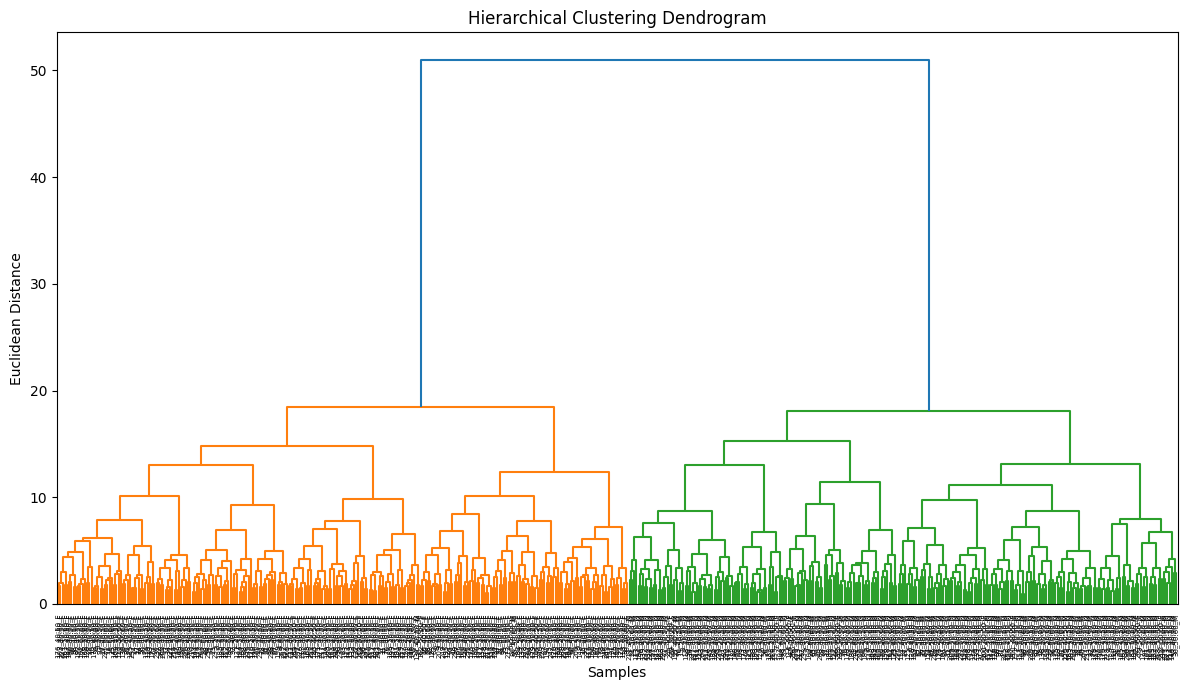

In [36]:
# Select only the protein columns for clustering
pathway_columns = ['Inflammation', 'Oxidative_Stress', 'Immunity', 'Apoptosis', 'Aging', 'Visual_Perception', 'Ciliopathy', 'Lipid_Metabolism', 'Cellular_Transport', 'Signal_Transduction']
df_proteins = pathway_scores[pathway_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=pathway_scores['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [37]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 2  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': pathway_scores['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['7_40:50_F', '69_50:60_F', '101_40:50_F', '114_40:50_F', '201_40:50_F', '202_50:60_F', '205_50:60_F', '207_50:60_F', '231_50:60_F', '256_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_

In [38]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
2,255
1,245


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

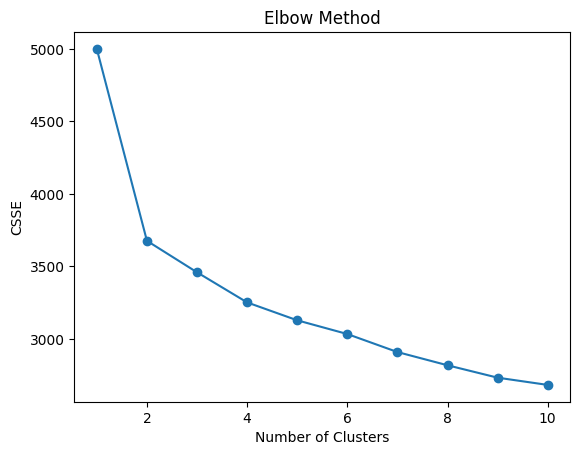

In [39]:
pro_columns = pathway_scores.columns[1:-2]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(pathway_scores[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [40]:
csse

[4999.999999999995,
 3677.036289628633,
 3459.845395029899,
 3252.363357879268,
 3128.9531241550694,
 3034.3299908320287,
 2910.088417539288,
 2818.897882112487,
 2733.423892669282,
 2683.496065872321]

In [41]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = pathway_scores.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

,Samples,Inflammation,Oxidative_Stress,Immunity,Apoptosis,Aging,Visual_Perception,Ciliopathy,Lipid_Metabolism,Cellular_Transport,Signal_Transduction,Gender,Age_Group,Cluster
0,1_50:60_F,0.309445,0.467509,0.360656,0.453810,0.271825,0.242727,0.279516,0.390963,0.526753,0.356725,Female,50-60,1
1,2_50:60_F,0.323115,0.407942,0.767213,0.269724,0.202381,0.282627,0.448032,0.666012,0.652214,0.278655,Female,50-60,1
2,3_40:50_F,0.359155,0.640794,0.616393,0.696561,0.414683,0.293433,0.697275,0.523903,0.664207,0.391813,Female,40-50,1
3,4_40:50_F,0.272162,0.667870,0.573770,0.620364,0.351190,0.675810,0.699294,0.471513,0.583948,0.282456,Female,40-50,1
4,5_50:60_F,0.431649,0.525271,0.983607,0.240391,0.228175,0.542810,0.530777,0.441388,0.470480,0.649123,Female,50-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,235_50:60_M,0.548467,0.382671,0.459016,0.361767,0.492063,0.696592,0.808274,0.336608,0.434502,0.502924,Male,50-60,0
496,236_40:50_M,0.607705,0.207581,0.508197,0.516858,0.605159,0.739817,0.880928,0.563196,0.387454,0.662573,Male,40-50,0
497,237_50:60_M,0.763049,0.406137,0.327869,0.325691,0.492063,0.740648,0.255298,0.541585,0.661439,0.785380,Male,50-60,0
498,238_40:50_M,0.659486,0.388087,0.163934,0.460553,0.716270,0.458853,0.292634,0.432220,0.092251,0.719298,Male,40-50,0


In [42]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['7_40:50_F', '101_40:50_F', '114_40:50_F', '200_40:50_F', '201_40:50_F', '256_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '55_50:60_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M',

In [43]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
1,257
0,243


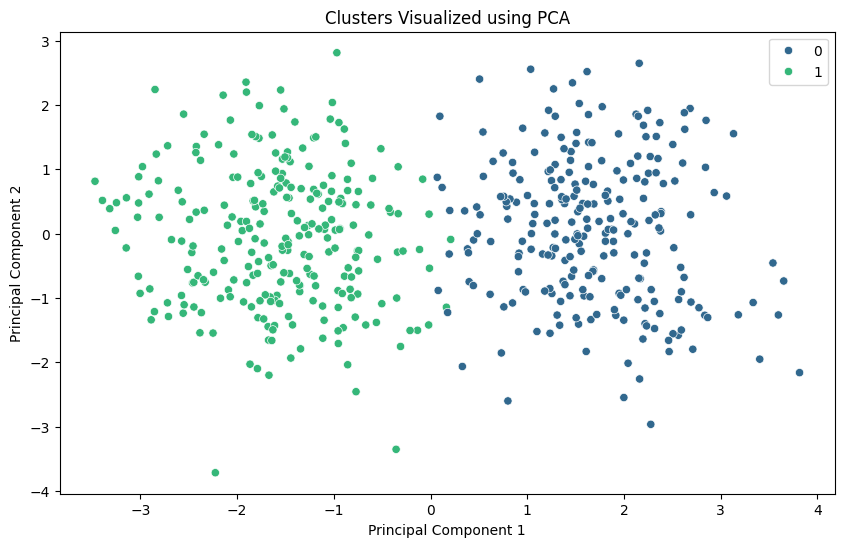

In [44]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

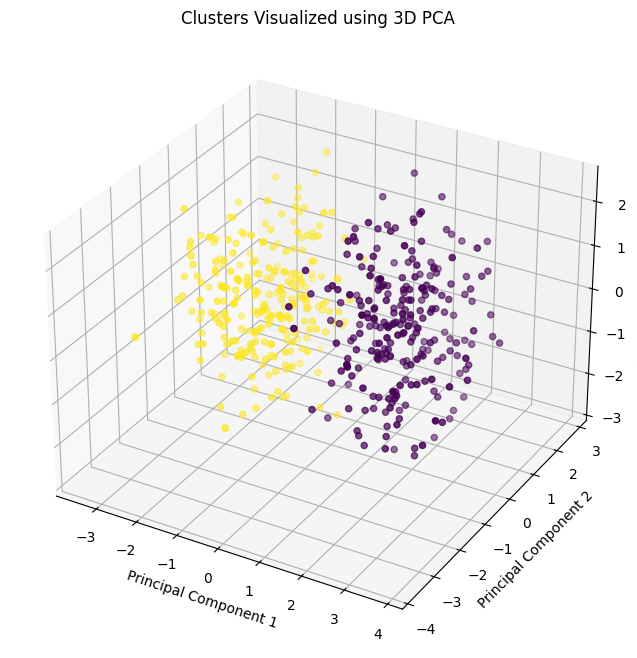

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
